In [ ]:
# Future Stock Price Predictor

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

df = yf.download("TSLA")
df["Next_Close"] = df["Close"].shift(-1)
df.dropna(inplace=True)
df["Volume"] = df["Volume"]/100000
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Next_Close
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2026-01-02,438.070007,458.339996,435.299988,457.799988,855.354,451.670013
2026-01-05,451.670013,457.549988,444.570007,447.989990,679.408,432.959991
2026-01-06,432.959991,448.250000,428.779999,446.380005,890.938,431.410004
2026-01-07,431.410004,438.369995,431.290009,435.899994,598.288,435.799988
2026-01-08,435.799988,436.890015,424.369995,427.890015,570.411,445.010010


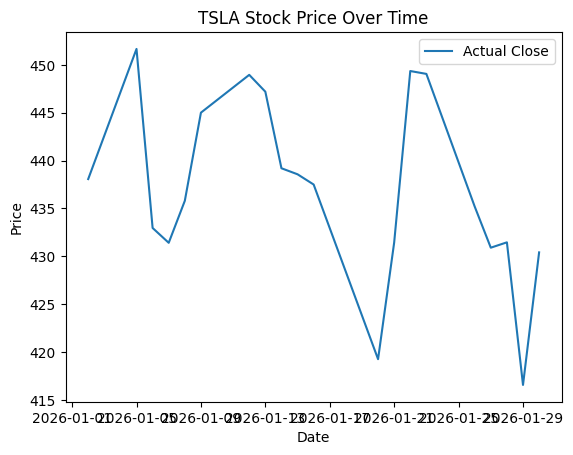

In [9]:
#plotting Graph
plt.figure()
plt.plot(df['Close'], label='Actual Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TSLA Stock Price Over Time')
plt.legend()
plt.show()


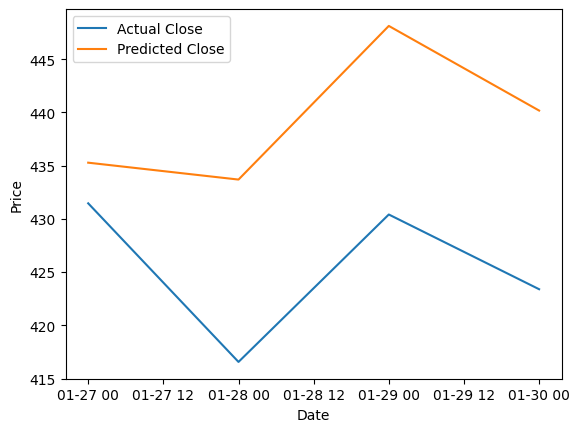

Next day predicted price: [440.17512356]


In [10]:
#Training and Predicting 
X = df[["Open","High","Low","Volume"]]
Y = df[["Next_Close"]]

split = int(len(df)*0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

plt.figure()
plt.plot(Y_test.index,Y_test,label = "Actual Close")
plt.plot(Y_test.index,Y_pred,label = "Predicted Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

latest_data = X.iloc[-1:].values
next_day_price = model.predict(latest_data)
print("Next day predicted price:", next_day_price[0])
